### Unmasking the Fraudsters: How Machine Learning is Revolutionizing Credit Card Fraud Detection

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import joblib


In [6]:
data=pd.read_csv('C:/Users/ACHYUTH/Desktop/CC proj/dataset1/creditcard.csv')

## DATA PREPROCESSING

In [7]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [8]:
data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [9]:
data.shape

(284807, 31)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [12]:
data.isnull()

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        ...    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
0       ...  False  False  False  False  False  False  False  False   False   
1       ...  False  False  False  False  False  False  False  False   False   
2       ...  False  False  False  False  False  False  False  False   False   
3       ...  False  False  False  False  False  False  False  False   False   
4       ...  False  False  False  False  False  False  False  False   False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
284802  ...  False  False  False  False  False  False  False  False   False   
284803  ...  False  False  False  False  False  False  False  False   False   
284804  ...  False  False  False  False  False  False  False  False   False   
284805  ...  False  False  False  False  False  False  False  False   False   
284806  ...  False  False  False  False  False  False  False  False   False   

        Class  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
284802  False  
284803  False  
284804  False  
284805  False  
284806  False  

[284807 rows x 31 columns]

In [13]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### EXPLORING THE DATASET

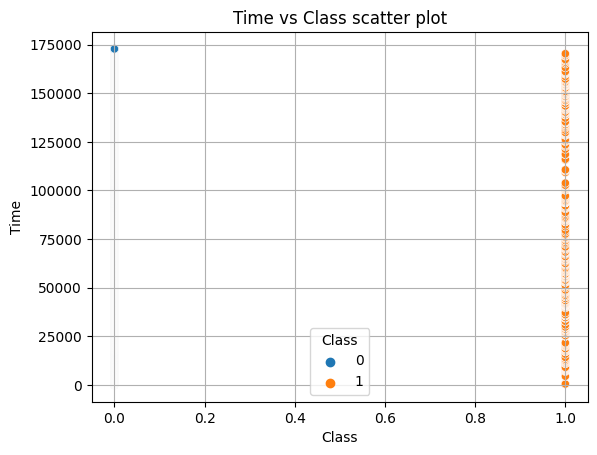

In [14]:
sns.scatterplot(x=data["Class"],y=data["Time"],hue=data["Class"]) #There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.
plt.title("Time vs Class scatter plot")
plt.grid()

In [15]:
from sklearn.preprocessing import StandardScaler

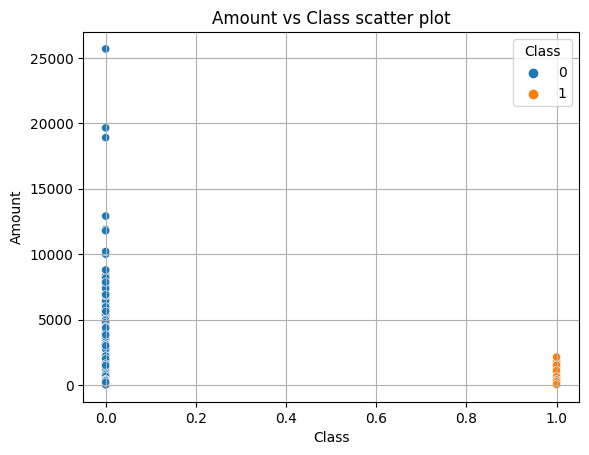

In [16]:
sns.scatterplot(x=data["Class"],y=data["Amount"],hue=data["Class"])  #less amount get more fraud than more amount
plt.title("Amount vs Class scatter plot")
plt.grid()

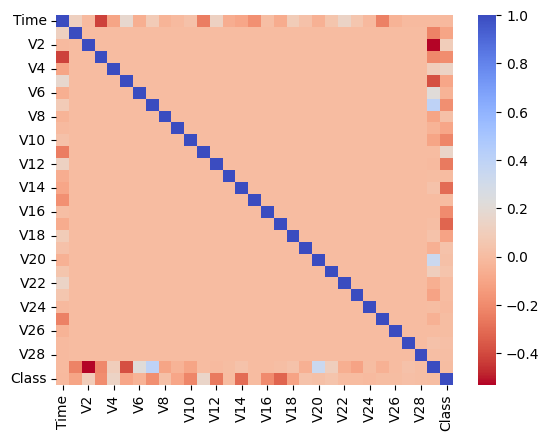

In [17]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

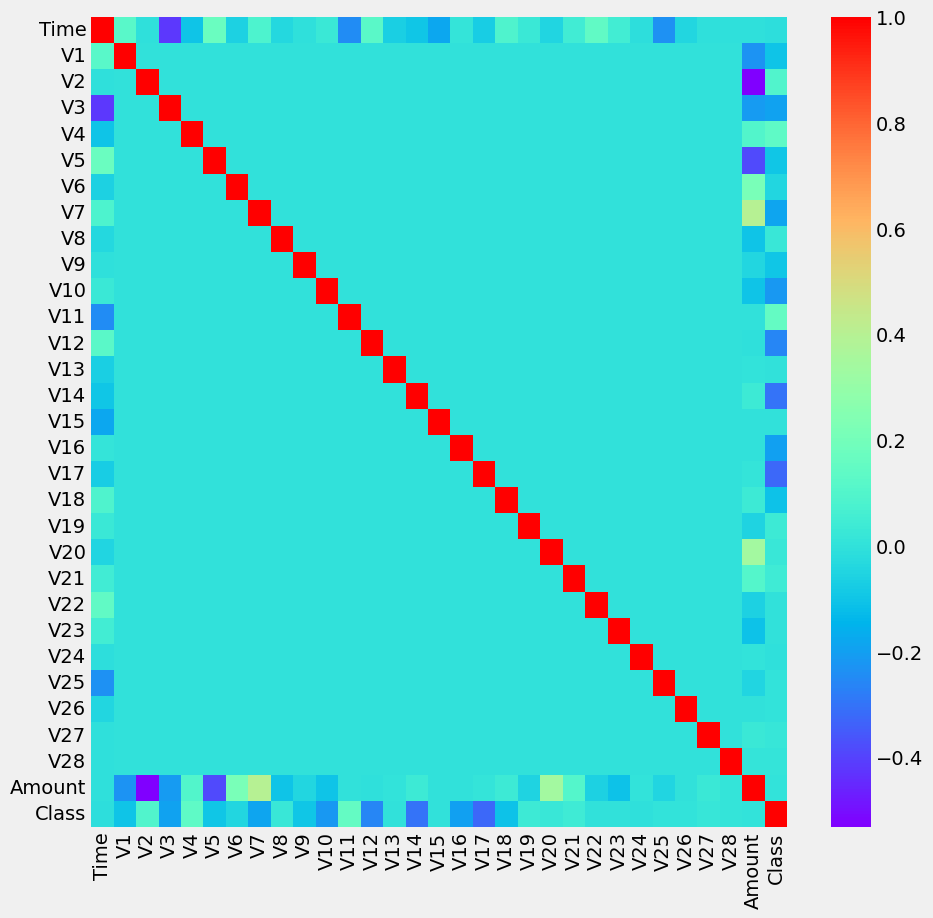

In [158]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),cmap='rainbow')
plt.show()

In [19]:
sc=StandardScaler()

In [ ]:
# ## Plotting all the variable in displot to visualise the distribution
# var = list(data.columns.values)
# # dropping Class columns from the list
# var.remove("Class")

# i = 0
# t0 = data.loc[data['Class'] == 0]
# t1 = data.loc[data['Class'] == 1]

# plt.figure()
# fig, ax = plt.subplots(10,3,figsize=(30,45));

# for feature in var:
#     i += 1
#     plt.subplot(10,3,i)
#     sns.kdeplot(t0[feature], bw_adjust=0.5,label="0")
#     sns.kdeplot(t1[feature], bw_adjust=0.5,label="1")
#     plt.xlabel(feature, fontsize=12)
#    # locs, labels = plt.xticks()
#    # plt.tick_params(axis='both', which='major', labelsize=12)
#     plt.grid()
# plt.show()

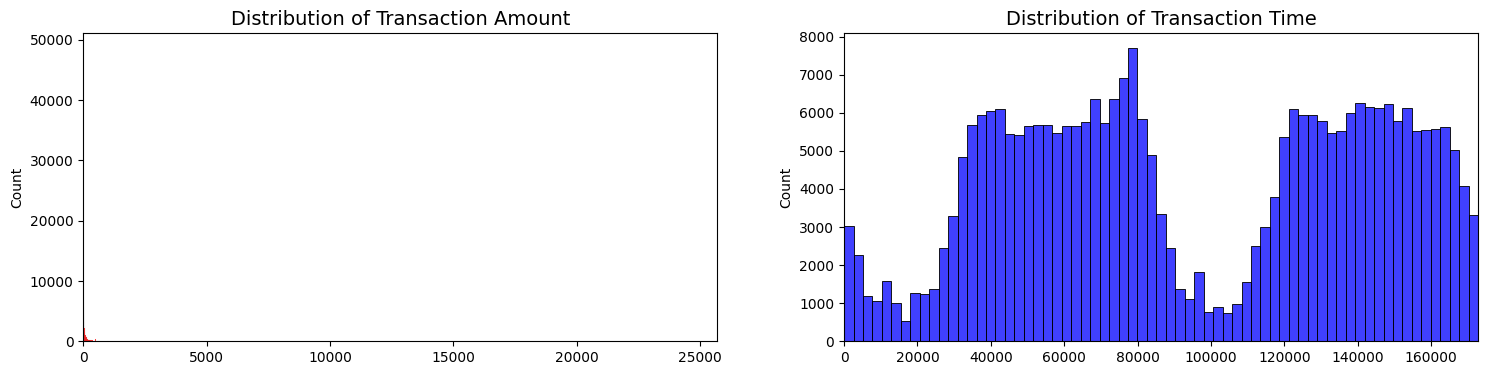

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

 To fit the data into a model we transform it into a form that is more suitable for the model in a single step ...here Amount column is different from all other cols in the dataset

In [22]:
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))
data


Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28    Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244964   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342475   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.160686   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.140534   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073403   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731 -0.350151   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527 -0.254117   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561 -0.081839   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533 -0.313249   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  0.514355   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

 Here Time col is an external deciding factor ..so we drop it

In [23]:
data1=data.drop('Time',axis=1)

In [24]:
data1.shape

(284807, 30)

checking whether our dataset contain dup values or not

In [25]:
data1.duplicated().any()

True

In [26]:
data1=data1.drop_duplicates()
data1

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.018307  0.277838   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.247998  0.771679   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274   
4       0.592941 -0.270533  0.817739  0.753074  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  0.213454  0.111864   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.214205  0.924384   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.232045  0.578229   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.265245  0.800049   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28    Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244964   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342475   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.160686   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.140534   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073403   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731 -0.350151   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527 -0.254117   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561 -0.081839   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533 -0.313249   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  0.514355   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[275663 rows x 30 columns]

In [27]:
data1.shape

(275663, 30)

 so we have these many dup values

In [24]:
284807-275663

9144

In [28]:
data1['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

 so our dataset is highly unbalanced ...it means that the target value has uneven distribution of observations

<Axes: xlabel='Class', ylabel='count'>

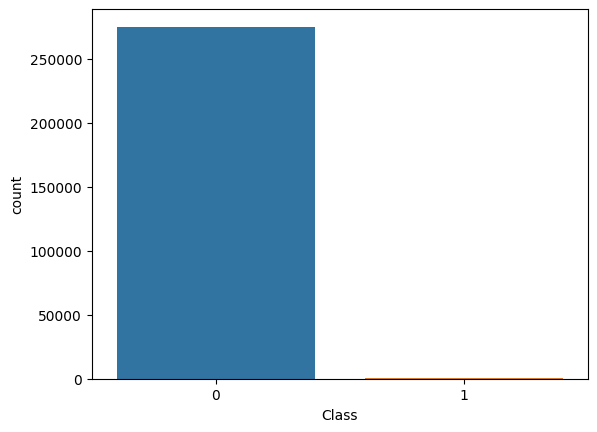

In [29]:
sns.countplot(x=data1['Class'])

 Let's check what happens if we not take the balanced dataset

In [30]:
x=data1.drop('Class',axis=1)
y=data1['Class']

Since it is a  Binary Classification problem

# LOGISTIC REGRESSION

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred1=log.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score

In [174]:
log.score(x_test,y_test)

0.9526315789473684

We have to send actual values and predicted values as the parameters of the accuracy_score

In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [38]:
p1=precision_score(y_test,y_pred1)
p1

0.8870967741935484

In [39]:
r1=recall_score(y_test,y_pred1)
r1

0.6043956043956044

In [41]:
r1=f1_score(y_test,y_pred1)
r1

0.718954248366013

 we can clearly observe that the precision and recall and f1_scores are very low when compared to the accuracy...this is bcoz we used imbalanced dataset

## DATA VISUALIZATION


In [42]:
plt.style.use("fivethirtyeight")

## HANDLING IMBALANCED DATASET

In [43]:
normal=data1[data1['Class']==0]
fraud=data1[data1['Class']==1]

In [44]:
normal.shape

(275190, 30)

In [45]:
fraud.shape

(473, 30)

consider just 473 normal samples inorder to make it balanced

## UNDERSAMPLING

In this we loss so much data..bcoz we reduce the rows inorder to make it balanced

In [46]:
normal_sample=normal.sample(n=473)

In [47]:
normal_sample.shape

(473, 30)

In [48]:
new_data=pd.concat([normal_sample,fraud])

In [49]:
new_data

V1        V2        V3        V4        V5        V6        V7  \
108261  1.081976  0.081735  0.296720  1.161170 -0.400714 -0.694271  0.145251   
111566 -2.279763 -1.993006  1.399334  1.437267  2.905139 -2.453566 -1.437380   
254456  1.982112 -0.465656 -0.389415  0.278832 -0.607545 -0.179188 -0.717360   
88428  -1.104541  0.951724  2.280619  0.938811 -0.873311  1.012118 -0.613517   
36648  -1.609149  0.336854  1.147631  0.984848 -1.048424  1.193439  1.169587   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  ...       V21       V22       V23  \
108261  0.040397 -0.103204  0.236768  ... -0.414348 -1.518255  0.193109   
111566 -0.192007  0.055162  0.358873  ... -0.261347 -0.300944 -0.221815   
254456  0.075959  0.935221  0.215531  ...  0.276785  0.978372  0.067976   
88428   1.018110 -0.386246 -0.209422  ...  0.371607  1.004163 -0.202699   
36648   0.717370 -0.693456 -0.740493  ...  0.029003 -0.381676  0.586005   
...          ...       ...       ...  ...       ...       ...       ...   
279863  0.697211 -2.064945 -5.587794  ...  0.778584 -0.319189  0.639419   
280143  0.248525 -1.127396 -3.232153  ...  0.370612  0.028234 -0.145640   
280149  1.210158 -0.652250 -3.463891  ...  0.751826  0.834108  0.190944   
281144  1.058733 -1.632333 -5.245984  ...  0.583276 -0.269209 -0.456108   
281674 -0.068384  0.577829 -0.888722  ... -0.164350 -0.295135 -0.072173   

             V24       V25       V26       V27       V28    Amount  Class  
108261  0.196534  0.124700 -0.852494 -0.017951  0.024093 -0.113784      0  
111566  0.447733 -1.342068  0.074982  0.316938 -0.150218 -0.329041      0  
254456 -0.267758 -0.203122  0.642640 -0.027733 -0.062630 -0.327362      0  
88428  -0.312228  0.163036 -0.003385  0.254455  0.084715 -0.177593      0  
36648  -0.366876  0.474599 -0.368183  0.110552  0.087960  1.002122      0  
...          ...       ...       ...       ...       ...       ...    ...  
279863 -0.294885  0.537503  0.788395  0.292680  0.147968  1.206024      1  
280143 -0.081049  0.521875  0.739467  0.389152  0.186637 -0.350191      1  
280149  0.032070 -0.739695  0.471111  0.385107  0.194361 -0.041818      1  
281144 -0.183659 -0.328168  0.606116  0.884876 -0.253700  0.626302      1  
281674 -0.450261  0.313267 -0.289617  0.002988 -0.015309 -0.183191      1  

[946 rows x 30 columns]

In [50]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [51]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = data1.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data1.loc[df['Class'] == 1]
non_fraud_df = data1.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

V1         V2         V3        V4         V5        V6  \
423      1.169209  -0.032254   1.011697  1.353641  -0.876062 -0.320567   
279863  -1.927883   1.125653  -4.518331  1.749293  -1.566487 -2.010494   
64460  -11.205461   7.914633 -13.987752  4.333341  -8.484970 -3.506561   
234574  -1.053840   4.362801  -6.023534  5.304534   1.480738 -2.193821   
15751  -24.590245  14.044567 -26.278701  6.320089 -18.224513 -4.609968   

               V7         V8        V9       V10  ...       V21       V22  \
423     -0.443364   0.053143  0.868260 -0.154678  ...  0.083530  0.452190   
279863  -0.882850   0.697211 -2.064945 -5.587794  ...  0.778584 -0.319189   
64460   -8.935243   7.704449 -2.336584 -5.927359  ...  0.942593 -0.987848   
234574  -1.530817   0.626857 -4.037021 -6.285424  ...  0.397954 -0.945402   
15751  -17.681003  16.213627 -3.794093 -8.372753  ...  1.777063 -1.804874   

             V23       V24       V25       V26       V27       V28    Amount  \
423    -0.134359  0.407710  0.633324 -0.213844  0.056280  0.028997 -0.313368   
279863  0.639419 -0.294885  0.537503  0.788395  0.292680  0.147968  1.206024   
64460  -0.279446 -0.027299  0.644344 -0.263078  1.084023  0.211933  0.046539   
234574 -0.376138 -0.220480  0.264003  0.048935  0.847220  0.531932 -0.353229   
15751  -1.140605  0.152234  1.715997 -0.220471  1.434951  0.422492  0.046539   

        Class  
423         0  
279863      1  
64460       1  
234574      1  
15751       1  

[5 rows x 30 columns]

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


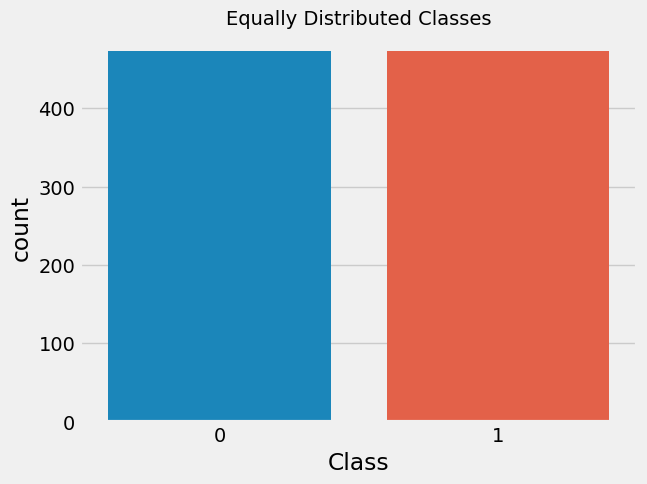

In [52]:
print('Distribution of the Classes in the subsample dataset')
print(new_data['Class'].value_counts()/len(new_data))



sns.countplot(x=new_data['Class'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## Now  Dataset is Balanced

In [53]:
new_data.head()

V1        V2        V3        V4        V5        V6        V7  \
108261  1.081976  0.081735  0.296720  1.161170 -0.400714 -0.694271  0.145251   
111566 -2.279763 -1.993006  1.399334  1.437267  2.905139 -2.453566 -1.437380   
254456  1.982112 -0.465656 -0.389415  0.278832 -0.607545 -0.179188 -0.717360   
88428  -1.104541  0.951724  2.280619  0.938811 -0.873311  1.012118 -0.613517   
36648  -1.609149  0.336854  1.147631  0.984848 -1.048424  1.193439  1.169587   

              V8        V9       V10  ...       V21       V22       V23  \
108261  0.040397 -0.103204  0.236768  ... -0.414348 -1.518255  0.193109   
111566 -0.192007  0.055162  0.358873  ... -0.261347 -0.300944 -0.221815   
254456  0.075959  0.935221  0.215531  ...  0.276785  0.978372  0.067976   
88428   1.018110 -0.386246 -0.209422  ...  0.371607  1.004163 -0.202699   
36648   0.717370 -0.693456 -0.740493  ...  0.029003 -0.381676  0.586005   

             V24       V25       V26       V27       V28    Amount  Class  
108261  0.196534  0.124700 -0.852494 -0.017951  0.024093 -0.113784      0  
111566  0.447733 -1.342068  0.074982  0.316938 -0.150218 -0.329041      0  
254456 -0.267758 -0.203122  0.642640 -0.027733 -0.062630 -0.327362      0  
88428  -0.312228  0.163036 -0.003385  0.254455  0.084715 -0.177593      0  
36648  -0.366876  0.474599 -0.368183  0.110552  0.087960  1.002122      0  

[5 rows x 30 columns]

In [54]:
x=new_data.drop('Class',axis=1)
y=new_data['Class']

# MACHINE LEARNING  ALGORITHMS

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

## LOGISTIC REGRESSION

In [56]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred2=log.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,y_pred2)

0.9526315789473684

In [60]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [61]:
precision_score(y_test,y_pred2)

1.0

In [62]:
recall_score(y_test,y_pred2)

0.9117647058823529

In [64]:
f1_score(y_test,y_pred2)

0.9538461538461539

# Decision Tree 

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred3=dt.predict(x_test)

In [67]:
accuracy_score(y_test,y_pred3)

0.9368421052631579

In [68]:
precision_score(y_test,y_pred3)

0.96875

In [69]:
recall_score(y_test,y_pred3)

0.9117647058823529

In [70]:
f1_score(y_test,y_pred3)

0.9393939393939394

## RANDOM FOREST

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
y_pred4=rf.predict(x_test)

In [73]:
accuracy_score(y_test,y_pred4)

0.9368421052631579

In [74]:
precision_score(y_test,y_pred4)

0.9891304347826086

In [75]:
recall_score(y_test,y_pred4)

0.8921568627450981

In [76]:
f1_score(y_test,y_pred4)

0.9381443298969072

In [77]:
final_data=pd.DataFrame({'Models':['LR','DT','RF'],
             'Accuracy':[accuracy_score(y_test,y_pred2)*100,
                        accuracy_score(y_test,y_pred3)*100,
                        accuracy_score(y_test,y_pred4)*100
              ]})

In [78]:
final_data

Models   Accuracy
0     LR  95.263158
1     DT  93.684211
2     RF  93.684211

<Axes: xlabel='Models', ylabel='Accuracy'>

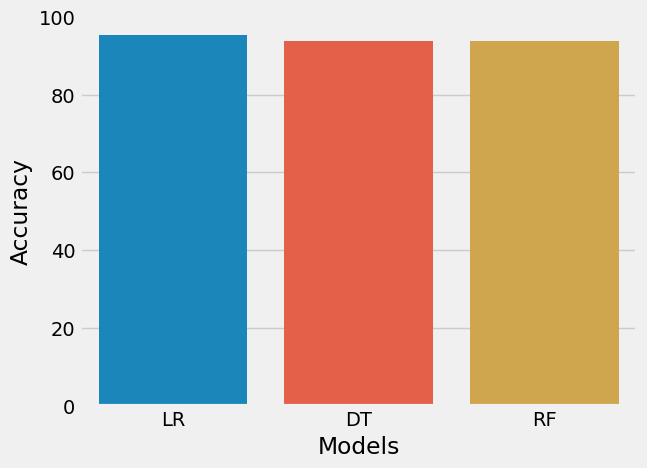

In [79]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])

In [ ]:
As we know that reducing the number of rows in dataset is a good choice inorder to get the accurate results by our model.....so now we try to increase the number of rows in the dataset by using various modes like using SMOTE technique and LGBM classifier 

remember that barplot takes the parameters as x and y ....

# OVER SAMPLING

In [80]:
x=data.drop('Class',axis=1)
y=data['Class']

In [81]:
x.shape

(284807, 30)

In [82]:
y.shape

(284807,)

In [83]:
data.isnull()

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        ...    V21    V22    V23    V24    V25    V26    V27    V28  Amount  \
0       ...  False  False  False  False  False  False  False  False   False   
1       ...  False  False  False  False  False  False  False  False   False   
2       ...  False  False  False  False  False  False  False  False   False   
3       ...  False  False  False  False  False  False  False  False   False   
4       ...  False  False  False  False  False  False  False  False   False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
284802  ...  False  False  False  False  False  False  False  False   False   
284803  ...  False  False  False  False  False  False  False  False   False   
284804  ...  False  False  False  False  False  False  False  False   False   
284805  ...  False  False  False  False  False  False  False  False   False   
284806  ...  False  False  False  False  False  False  False  False   False   

        Class  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
284802  False  
284803  False  
284804  False  
284805  False  
284806  False  

[284807 rows x 31 columns]

In [84]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Synthetic Minority Oversampling Technique(SMOTE)

In [175]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [200]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

## LOGISTIC REGRESSION

In [227]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [228]:
 y_pred5=log.predict(x_test) 

In [229]:
accuracy_score(y_test,y_pred5)

0.9526315789473684

In [230]:
precision_score(y_test,y_pred5)

1.0

In [231]:
recall_score(y_test,y_pred5)

0.9117647058823529

In [232]:
f1_score(y_test,y_pred5)

0.9538461538461539

## DECISION TREE

In [234]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [235]:
y_pred6=dt.predict(x_test)

In [236]:
accuracy_score(y_test,y_pred6)

0.9368421052631579

In [237]:
precision_score(y_test,y_pred6)

0.96875

In [238]:
recall_score(y_test,y_pred6)

0.9117647058823529

In [239]:
f1_score(y_test,y_pred6)

0.9393939393939394

## RANDOM FOREST

In [240]:
rf=RandomForestClassifier()

In [241]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [116]:
# data1.shape

(275663, 30)

In [117]:
# data1['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [242]:
y_pred7=log.predict(x_test)

In [243]:
accuracy_score(y_test,y_pred7)

0.9526315789473684

In [244]:
precision_score(y_test,y_pred7)

1.0

In [245]:
recall_score(y_test,y_pred7)

0.9117647058823529

In [246]:
f1_score(y_test,y_pred7)

0.9538461538461539

In [247]:
final_data=pd.DataFrame({'Models':['LR','DT','RF'],
             'Accuracy':[accuracy_score(y_test,y_pred5)*100,
                        accuracy_score(y_test,y_pred6)*100,
                        accuracy_score(y_test,y_pred7)*100],
             'Precision':[precision_score(y_test,y_pred5)*100,
                          precision_score(y_test,y_pred6)*100,
                          precision_score(y_test,y_pred7)*100],
             'recall':[recall_score(y_test,y_pred5)*100,
                      recall_score(y_test,y_pred6)*100,
                      recall_score(y_test,y_pred7)*100,]
                                     
                        })

In [248]:
final_data

Models   Accuracy  Precision     recall
0     LR  95.263158    100.000  91.176471
1     DT  93.684211     96.875  91.176471
2     RF  95.263158    100.000  91.176471

<Axes: xlabel='Models', ylabel='Accuracy'>

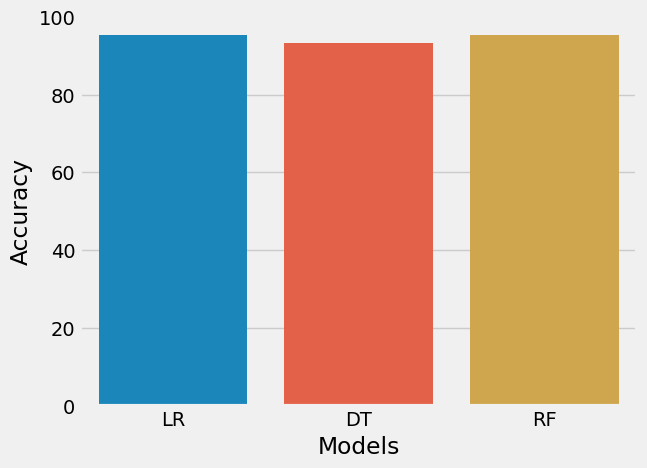

In [111]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])

## SAVE THE MODEL  

To predict the Future transactions.....so we train the model with  entire Dataset

since we got maximum accuracy in the decision tree classifier so we use this classifier to train our model with the entire dataset

## LOGISTIC REGERESSION

In [255]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [113]:
rf=RandomForestClassifier(n_estimators=10)
rf

RandomForestClassifier(n_estimators=10)

In [256]:
joblib.dump(log,"model_predict")

['model_predict']

In [267]:
pd.options.display.max_columns=None

In [276]:
findout=joblib.load("model_predict")
result=findout.predict([[1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,4.876438,0.226138,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191]])
if(result==0):
    print("it is NON_FRAUD")
else:
    print("ALERT! is a Fraud transaction.")

ALERT! is a Fraud transaction.


C:\Users\ACHYUTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## RANDOM FOREST

In [260]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [261]:
joblib.dump(rf,"model_uisng_RandomForest")

['model_uisng_RandomForest']

In [278]:
ans=joblib.load("model_uisng_RandomForest")
result=ans.predict([[1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,4.876438,0.226138,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191]])
if(result):
    print("ALERT!!! IT IS A FRAUD TRANSACTION...")
else:
    print("YAY!!! IT IS A GENUINE TRANSACTION...")

ALERT!!! IT IS A FRAUD TRANSACTION...


C:\Users\ACHYUTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [159]:
from sklearn.metrics import confusion_matrix

In [170]:
mat

array([[88,  9],
       [ 0, 93]], dtype=int64)

<Axes: >

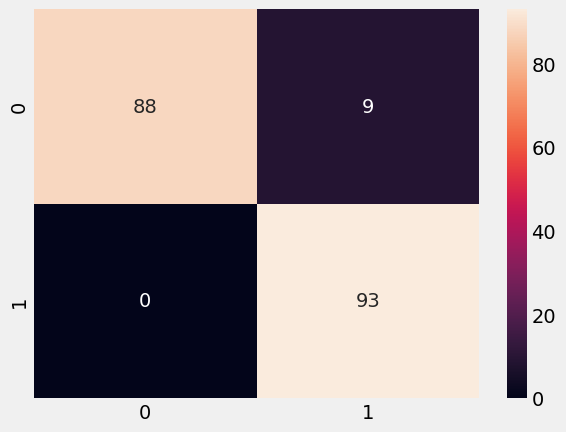

In [168]:
sns.heatmap(mat,annot=True)

### RANDOM OVERSAMPLER TECHNIQUE

In [202]:
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle

In [203]:
over=RandomOverSampler()

In [204]:
over_sampler=RandomOverSampler()

In [205]:
x,y=over_sampler.fit_resample(x,y)

<Axes: xlabel='Class', ylabel='count'>

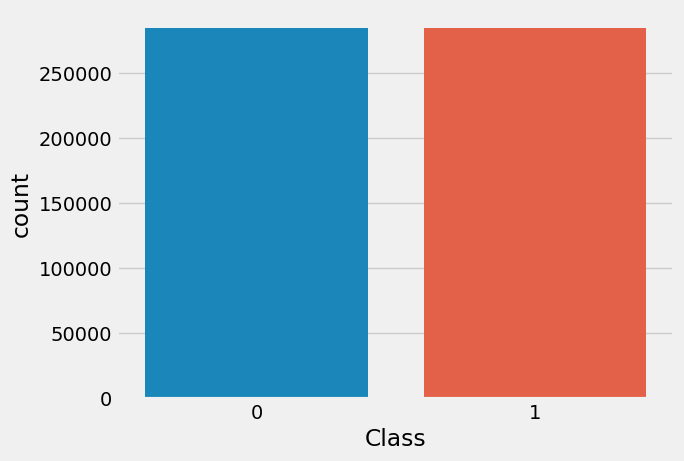

In [206]:
sns.countplot(x=y)

In [207]:
len(x)

568630

In [208]:
len(y)

568630

In [212]:
x=new_data.drop('Class',axis=1)
y=new_data['Class']

In [268]:
new_data

V1        V2        V3        V4        V5        V6        V7  \
108261  1.081976  0.081735  0.296720  1.161170 -0.400714 -0.694271  0.145251   
111566 -2.279763 -1.993006  1.399334  1.437267  2.905139 -2.453566 -1.437380   
254456  1.982112 -0.465656 -0.389415  0.278832 -0.607545 -0.179188 -0.717360   
88428  -1.104541  0.951724  2.280619  0.938811 -0.873311  1.012118 -0.613517   
36648  -1.609149  0.336854  1.147631  0.984848 -1.048424  1.193439  1.169587   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10       V11       V12       V13       V14  \
108261  0.040397 -0.103204  0.236768  1.039401 -0.195891 -2.331969  1.111926   
111566 -0.192007  0.055162  0.358873  0.393170  0.099300 -0.042724 -0.390800   
254456  0.075959  0.935221  0.215531  0.484046  0.881272  0.139129 -0.006083   
88428   1.018110 -0.386246 -0.209422  0.795499  0.081995 -0.667320  0.467046   
36648   0.717370 -0.693456 -0.740493  0.632451  0.643808 -0.436642  0.482516   
...          ...       ...       ...       ...       ...       ...       ...   
279863  0.697211 -2.064945 -5.587794  2.115795 -5.417424 -1.235123 -6.665177   
280143  0.248525 -1.127396 -3.232153  2.858466 -3.096915 -0.792532 -5.210141   
280149  1.210158 -0.652250 -3.463891  1.794969 -2.775022 -0.418950 -4.057162   
281144  1.058733 -1.632333 -5.245984  1.933520 -5.030465 -1.127455 -6.416628   
281674 -0.068384  0.577829 -0.888722  0.491140  0.728903  0.380428 -1.948883   

             V15       V16       V17       V18       V19       V20       V21  \
108261  0.380003  0.464203 -0.532831  0.077202  0.143681 -0.167245 -0.414348   
111566  1.806118 -0.435232  0.642774 -0.612230  0.540823 -0.367482 -0.261347   
254456 -0.135341  0.654946 -0.913017  0.694240  0.048870 -0.174297  0.276785   
88428   1.591567  0.471143 -0.240398  1.200262  0.365859  0.153790  0.371607   
36648  -0.317350 -0.448911  0.301933  0.078819  0.881855  0.750609  0.029003   
...          ...       ...       ...       ...       ...       ...       ...   
279863  0.401701 -2.897825 -4.570529 -1.315147  0.391167  1.252967  0.778584   
280143 -0.613803 -2.155297 -3.267116 -0.688505  0.737657  0.226138  0.370612   
280149 -0.712616 -1.603015 -5.035326 -0.507000  0.266272  0.247968  0.751826   
281144  0.141237 -2.549498 -4.614717 -1.478138 -0.035480  0.306271  0.583276   
281674 -0.832498  0.519436  0.903562  1.197315  0.593509 -0.017652 -0.164350   

             V22       V23       V24       V25       V26       V27       V28  \
108261 -1.518255  0.193109  0.196534  0.124700 -0.852494 -0.017951  0.024093   
111566 -0.300944 -0.221815  0.447733 -1.342068  0.074982  0.316938 -0.150218   
254456  0.978372  0.067976 -0.267758 -0.203122  0.642640 -0.027733 -0.062630   
88428   1.004163 -0.202699 -0.312228  0.163036 -0.003385  0.254455  0.084715   
36648  -0.381676  0.586005 -0.366876  0.474599 -0.368183  0.110552  0.087960   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -0.319189  0.639419 -0.294885  0.537503  0.788395  0.292680  0.147968   
280143  0.028234 -0.145640 -0.081049  0.521875  0.739467  0.389152  0.186637   
280149  0.834108  0.190944  0.032070 -0.739695  0.471111  0.385107  0.194361   
281144 -0.269209 -0.456108 -0.183659 -0.328168  0.606116  0.884876 -0.253700   
281674 -0.295135 -0.072173 -0.450261  0.313267 -0.289617  0.002988 -0.015309   

          Amount  Class  
108261 -0.113784      0  
111566 -0.329041      0  
254456 -0.327362      0  
88428  -0.177593      0  
36648   1.002122      0  
...          .

In [213]:
len(x)

946

In [214]:
len(y)

946

In [215]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [216]:
rf=RandomForestClassifier()

In [217]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [221]:
y_pred8=rf.predict(x_test)

In [222]:
accuracy_score(y_test,y_pred8)

0.9421052631578948

In [223]:
precision_score(y_test,y_pred8)

0.989247311827957

In [224]:
recall_score(y_test,y_pred8)

0.9019607843137255

In [225]:
f1_score(y_test,y_pred8)

0.9435897435897437

In [249]:
final_data=pd.DataFrame({'Models':['LR','DT','RF'],
             'Accuracy':[accuracy_score(y_test,y_pred5)*100,
                        accuracy_score(y_test,y_pred6)*100,
                        accuracy_score(y_test,y_pred8)*100],
             'Precision':[precision_score(y_test,y_pred5)*100,
                          precision_score(y_test,y_pred6)*100,
                          precision_score(y_test,y_pred8)*100],
             'recall':[recall_score(y_test,y_pred5)*100,
                      recall_score(y_test,y_pred6)*100,
                      recall_score(y_test,y_pred8)*100,]
                                     
                        })